### Recuperação da Informação
#### Professor: Leandro Balby

#### Aluno: Lucas Barros Rocha - 115111579




In [53]:
#bibliotecas

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter

import re
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')

#palavras a serem desconsideradas
stopwords = nltk.corpus.stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Importando os Dados, que são: notícias retiradas por crawler+scraper de portais de notícas online.

In [0]:
result = pd.read_csv('https://raw.githubusercontent.com/lucasbarrosrocha/rec-info/master/dataframes/results.csv')

### 1) Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas)

A minha estratégia de tokenização é caracterizar palavras palavras da líingua portuguesa como sequência de caracteres que possuam caracteres alfanuméricos com tamanho maior ou igual a 3.Com isso, utilizei o filtro de stopwords a partir da biblioteca nkt, para remover algumas palavras e processamento do texto.

In [0]:
TAMANHO_MINIMO_PALAVRA = 3

todas_palavras = []
palavras_filtradas = []

tknz = RegexpTokenizer(r'(\b[A-Za-z][a-z]{2,27}\b)')

for text in result.text:
   palavras = [palavra for palavra in tknz.tokenize(text.lower())
           if not bool(re.search(r'\d', palavra))]
   todas_palavras.extend(palavras)

palavras_filtradas = [palavra for palavra in todas_palavras if palavra not in stopwords and len(palavra) >= TAMANHO_MINIMO_PALAVRA]

* Quantidade de palavras sem a filtragem


In [56]:

len(todas_palavras)


127127

* Quantidade de palavras com a filtragem

In [57]:
len(palavras_filtradas)

93758

### 2) Refaça a questão 2 do Laboratório anterior usando os tokens produzidos.



In [0]:
quantidade_palavras_filtradas = len(palavras_filtradas)
frequencia_palavras = Counter(palavras_filtradas)

In [59]:

palavras_frequentes = frequencia_palavras.most_common(50)

tabela = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela['r'] = [rank for rank in range(0, len(palavras_frequentes))]

tabela['Word'] = [palavra[0] for palavra in palavras_frequentes]
tabela['Frequency'] = [palavra[1] for palavra in palavras_frequentes]

tabela['Pr(%)'] = [round((palavra[1] / quantidade_palavras_filtradas)*100, 2) for palavra in palavras_frequentes]
tabela['r.Pr'] = round((tabela['Pr(%)']/100)*tabela['r'], 3)

tabela = tabela.set_index('r')
tabela

,Word,Frequency,Pr(%),r.Pr
r,,,,
0,anos,585,0.62,0.000
1,ser,504,0.54,0.005
2,sobre,426,0.45,0.009
3,presidente,416,0.44,0.013
4,bolsonaro,376,0.40,0.016
5,governo,352,0.38,0.019
6,ainda,337,0.36,0.022
7,brasil,333,0.36,0.025
8,ter,257,0.27,0.022


### 3) Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [0]:

stemmer = nltk.stem.SnowballStemmer('portuguese')

palavras_stemmed = [stemmer.stem(palavra) for palavra in palavras_filtradas]

p_stemmed = sorted(set(palavras_stemmed))
p_filtradas = sorted(set(palavras_filtradas))

* Quantidade de palavras sem Steamming

In [61]:
len(p_filtradas)

17802

* Quantidade de palavras com Steamming

In [62]:
len(p_stemmed)

8817


* **Falsos positivos:** ladeira/lados - lad ,  quarta/quarto/quartéis - quart,  duração/dureza - dur, sal/sala - sal

* **Falsos negativos:** roupag/roupagens, regul/regulament, passag/passageir, documento/documentos, secret/secretári.

### 4) Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

In [64]:
quantidade_palavras_stammed = len(palavras_stemmed)
frequencia_palavras_stemmed = Counter(palavras_stemmed)

palavras_frequentes_stemmed = frequencia_palavras_stemmed.most_common(50)

tabela_stammed = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela_stammed['r'] = [rank for rank in range(0, len(palavras_frequentes_stemmed))]


tabela_stammed['Word'] = [palavra[0] for palavra in palavras_frequentes_stemmed]
tabela_stammed['Frequency'] = [palavra[1] for palavra in palavras_frequentes_stemmed]

tabela_stammed['Pr(%)'] = [round((palavra[1] / quantidade_palavras_stammed)*100, 2) for palavra in palavras_frequentes_stemmed]
tabela_stammed['r.Pr'] = round((tabela_stammed['Pr(%)']/100)*tabela_stammed['r'], 3)

tabela_stammed

,Word,Frequency,r,Pr(%),r.Pr
0,pod,606,0,0.65,0.000
1,anos,585,1,0.62,0.006
2,ser,537,2,0.57,0.011
3,outr,535,3,0.57,0.017
4,part,498,4,0.53,0.021
5,tod,498,5,0.53,0.026
6,govern,451,6,0.48,0.029
7,president,442,7,0.47,0.033
8,sobr,431,8,0.46,0.037
9,nov,401,9,0.43,0.039


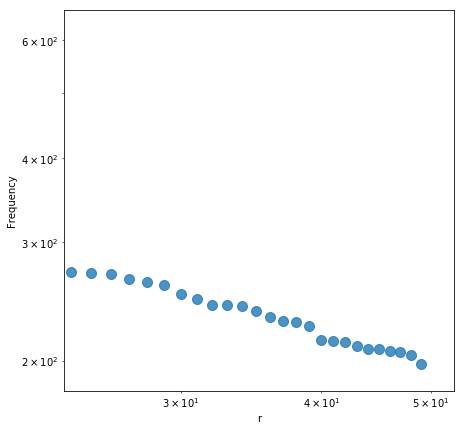

In [65]:

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", tabela_stammed, ax=ax, scatter_kws={"s": 100}, fit_reg = False)

A principal diferença encontrada é que nesse gráfico a frequência e muito maior que a o laboratório anterior.